In [6]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [2]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train),(X_test,y_test) = mnist.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(optimizer='rmsprop',metrics = ['accuracy'],loss = 'categorical_crossentropy')

X_train = X_train.reshape((X_train.shape[0],28,28,1))/255
X_test = X_test.reshape((X_test.shape[0],28,28,1))/255

model.fit(X_train,y_train,epochs = 10,batch_size = 128)

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2262 - accuracy: 0.9303
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0547 - accuracy: 0.9833
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0358 - accuracy: 0.9892
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0277 - accuracy: 0.9915
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0167 - accuracy: 0.9948
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0139 - accuracy: 0.9954
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0117 - accuracy: 0.9965
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0094 - accuracy: 0.9973
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0082 - accuracy: 0.9974

In [5]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9928


[0.031016184017062187, 0.9927999973297119]

In [2]:
import os, shutil

# Path to the data set where the original data was decompressed
original_dataset_dir = './dogs-vs-cats/train/'

# Path to the new data set where the smaller dataset
base_dir = './cats_and_dogs_reduced'

# Create the directory
#os.mkdir(base_dir)

In [3]:
# We create paths 
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')


In [4]:
train_cats_dir = os.path.join(train_dir,'cats')

train_dogs_dir = os.path.join(train_dir,'dogs')

test_cats_dir = os.path.join(test_dir,'cats')

test_dogs_dir = os.path.join(test_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')

validation_dogs_dir = os.path.join(validation_dir,'dogs')


In [ ]:
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(validation_dir)
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

In [5]:
# Names of the first 1000 images of cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# Copy each image into the appropriate folder (train)
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
# Do the same for the the validation data
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
# Copy each element 
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
# Test
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
# Copy each element 
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

# Dogs
# Names of the first 1000 images of dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# Copy each image into the appropriate folder (train)
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
# Do the same for the the validation data
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
# Copy each element 
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
# Test
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
# Copy each element 
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [31]:
# Building a first convnet 

model = Sequential()

# First stack, conv2d and maxpooling 
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(MaxPooling2D((2,2)))

# Second Stack, increasing dimension
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
          
# Third stack
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# Fourth stack
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

# Adding the classification layers
model.add(Flatten())

# Dense layers
model.add(Dense(512,activation='relu'))
# One neuron in the last layer, activation sigmoid, binary classification
# Either cat or dog
model.add(Dense(1,activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [33]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
# Using generators to feed training instances from directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory(
    # Source folder
    train_dir,
    # Target size
    target_size = (150,150),
    batch_size=20,
    class_mode='binary'
)

validation_gen = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=100,
    epochs = 30,
    validation_data = validation_gen,
    validation_steps = 50,
)

# The model will be trained using a generator. This means that the generator will draw the data from 
# The corresponding directory and feed it to the model directly along with the corresponding labels

# Very useful to avoid getting into conversions of pics to arrays (like on the chinese mnist task)
# To be noted, fit_generator is deprecated and fit supports generators

Epoch 1/30
100/100 [==============================] - 3s 33ms/step - loss: 0.7478 - accuracy: 0.5210 - val_loss: 0.6868 - val_accuracy: 0.5550
Epoch 2/30
100/100 [==============================] - 3s 32ms/step - loss: 0.6688 - accuracy: 0.6145 - val_loss: 0.6558 - val_accuracy: 0.5870
Epoch 3/30
100/100 [==============================] - 3s 32ms/step - loss: 0.6205 - accuracy: 0.6755 - val_loss: 0.6031 - val_accuracy: 0.6610
Epoch 4/30
100/100 [==============================] - 3s 32ms/step - loss: 0.5596 - accuracy: 0.7160 - val_loss: 0.5715 - val_accuracy: 0.6950
Epoch 5/30
100/100 [==============================] - 3s 33ms/step - loss: 0.5075 - accuracy: 0.7575 - val_loss: 0.8299 - val_accuracy: 0.6280
Epoch 6/30
100/100 [==============================] - 3s 32ms/step - loss: 0.4610 - accuracy: 0.7750 - val_loss: 0.5794 - val_accuracy: 0.7230
Epoch 7/30
100/100 [==============================] - 3s 32ms/step - loss: 0.4183 - accuracy: 0.8085 - val_loss: 0.5898 - val_accuracy: 0.7420

In [11]:
model.save('cats_dogs_firstmodel.h5')

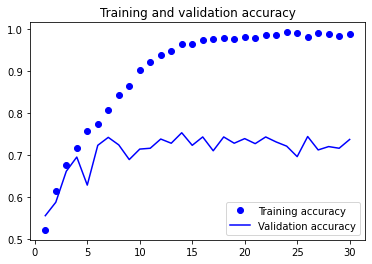

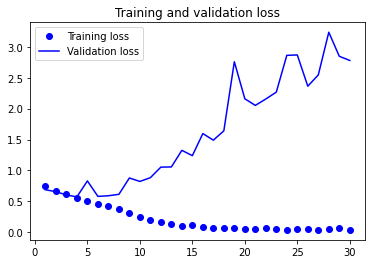

50/50 [==============================] - 1s 19ms/step - loss: 2.7803 - accuracy: 0.7370


[2.7802515029907227, 0.7369999885559082]

In [36]:
# Plotting the training and validation accuracys 



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

model.evaluate(validation_gen)

We notice that the training accuracy tends to rise, while the validation accuracy stalls, and the training loss decreases linearily (tends towards 0), while the validation loss rises after reaching its minimum early on. We will use data augmentation to improve the accuracy of the model.

In [37]:
# We configure a generator that will apply a series of transformations to the images 
# from the training set to create transformed images

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

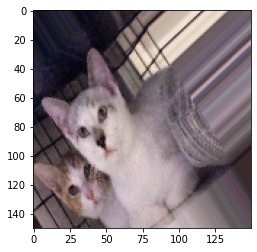

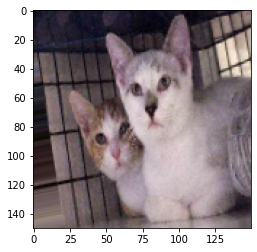

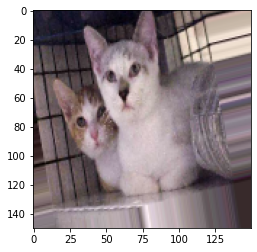

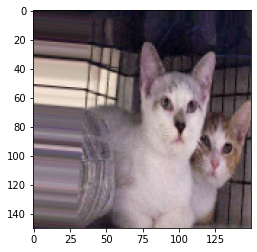

In [38]:
from tensorflow.keras.preprocessing import image

# Create the list of paths to the images of cats
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path,target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i ==4:
        break
plt.show()

In [39]:
# We train the new model using data augmentation first

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [40]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode='binary',
    
)

validation_generator = test_gen.flow_from_directory(
    
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    
)

test_generator = test_gen.flow_from_directory(
    
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
    
)

history = model.fit(
    
    train_generator,
    validation_data=validation_generator,
    epochs = 100,
    steps_per_epoch=100,
    validation_steps=50,
    
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 10s 95ms/step - loss: 0.6942 - accuracy: 0.4995 - val_loss: 0.6836 - val_accuracy: 0.6020
Epoch 2/100
100/100 [==============================] - 9s 95ms/step - loss: 0.6824 - accuracy: 0.5655 - val_loss: 0.6883 - val_accuracy: 0.5060
Epoch 3/100
100/100 [==============================] - 10s 98ms/step - loss: 0.6657 - accuracy: 0.5815 - val_loss: 0.6545 - val_accuracy: 0.5960
Epoch 4/100
100/100 [==============================] - 10s 95ms/step - loss: 0.6494 - accuracy: 0.6185 - val_loss: 0.6411 - val_accuracy: 0.6090
Epoch 5/100
100/100 [==============================] - 9s 94ms/step - loss: 0.6301 - accuracy: 0.6355 - val_loss: 0.6337 - val_accuracy: 0.6380
Epoch 6/100
100/100 [==============================] - 9s 95ms/step - loss: 0.6200 - accuracy: 0.6425 - val_loss: 0.6038 - val_accuracy: 0.6580
Epoch 7

100/100 [==============================] - 10s 97ms/step - loss: 0.4545 - accuracy: 0.7820 - val_loss: 0.4388 - val_accuracy: 0.7940
Epoch 57/100
100/100 [==============================] - 10s 97ms/step - loss: 0.4399 - accuracy: 0.8045 - val_loss: 0.4386 - val_accuracy: 0.7990
Epoch 58/100
100/100 [==============================] - 10s 96ms/step - loss: 0.4529 - accuracy: 0.7850 - val_loss: 0.4719 - val_accuracy: 0.7810
Epoch 59/100
100/100 [==============================] - 10s 95ms/step - loss: 0.4317 - accuracy: 0.7985 - val_loss: 0.4451 - val_accuracy: 0.7820
Epoch 60/100
100/100 [==============================] - 10s 97ms/step - loss: 0.4335 - accuracy: 0.8065 - val_loss: 0.6176 - val_accuracy: 0.7340
Epoch 61/100
100/100 [==============================] - 10s 97ms/step - loss: 0.4348 - accuracy: 0.7940 - val_loss: 0.4594 - val_accuracy: 0.7800
Epoch 62/100
100/100 [==============================] - 10s 97ms/step - loss: 0.4361 - accuracy: 0.7950 - val_loss: 0.4493 - val_accuracy

In [41]:
model.evaluate(test_generator)

50/50 [==============================] - 1s 19ms/step - loss: 0.4510 - accuracy: 0.7990


[0.4509516954421997, 0.7990000247955322]

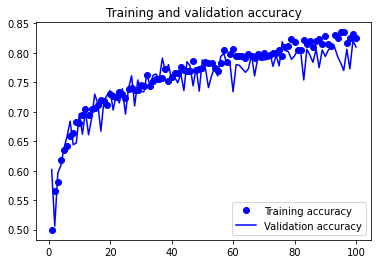

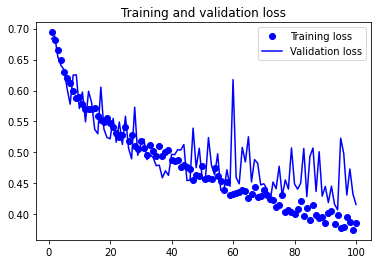

50/50 [==============================] - 1s 19ms/step - loss: 0.4159 - accuracy: 0.8100


[0.4158715009689331, 0.8100000023841858]

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

model.evaluate(validation_gen)

In [27]:
model.save('cats_and_dogs_small_2.h5')

In [7]:
# We will now use a pretrained ConvNet to improve the accuracy

from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150,150,3))

# Approach by adding dense layers and training the whole model again

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [51]:
# We freeze the weigths of the convolutional base
conv_base.trainable = False

model.compile(loss='binary_crossentropy',optimizer = tensorflow.keras.optimizers.RMSprop(lr=2e-5),metrics = ['accuracy'])

history = model.fit(train_gen,steps_per_epoch=100,epochs = 30,validation_data=validation_gen,validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 12s 117ms/step - loss: 0.5132 - accuracy: 0.7600 - val_loss: 0.4043 - val_accuracy: 0.8450
Epoch 2/30
100/100 [==============================] - 12s 118ms/step - loss: 0.3509 - accuracy: 0.8645 - val_loss: 0.3322 - val_accuracy: 0.8680
Epoch 3/30
100/100 [==============================] - 12s 120ms/step - loss: 0.2876 - accuracy: 0.8935 - val_loss: 0.2995 - val_accuracy: 0.8790
Epoch 4/30
100/100 [==============================] - 12s 121ms/step - loss: 0.2507 - accuracy: 0.9090 - val_loss: 0.2818 - val_accuracy: 0.8870
Epoch 5/30
100/100 [==============================] - 12s 120ms/step - loss: 0.2231 - accuracy: 0.9210 - val_loss: 0.2646 - val_accuracy: 0.8940
Epoch 6/30
100/100 [==============================] - 12s 120ms/step - loss: 0.2042 - accuracy: 0.9250 - val_loss: 0.2611 - val_accuracy: 0.8910
Epoch 7/30
100/100 [==============================] - 12s 120ms/step - loss: 0.1866 - accuracy: 0.9365 - val_loss: 0.2540 - val_ac

KeyboardInterrupt: 

In [13]:
# Chollet

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
conv_base.trainable = False

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6010 - acc: 0.6815 - val_loss: 0.4491 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 12s 122ms/step - loss: 0.4865 - acc: 0.7960 - val_loss: 0.3666 - val_acc: 0.8550
Epoch 3/30
100/100 [==============================] - 12s 122ms/step - loss: 0.4222 - acc: 0.8240 - val_loss: 0.3344 - val_acc: 0.8630
Epoch 4/30
100/100 [==============================] - 13s 125ms/step - loss: 0.4026 - acc: 0.8240 - val_loss: 0.3064 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 13s 126ms/step - loss: 0.3904 - acc: 0.8265 - val_loss: 0.3053 - val_acc: 0.8640
Epoch 6/30
100/100 [==============================] - 12s 124ms/step - loss: 0.3768 - acc: 0.8305 - val_loss: 0.2879 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 13s 128ms/step - loss: 0.3602 - acc: 0.8380 - val_lo

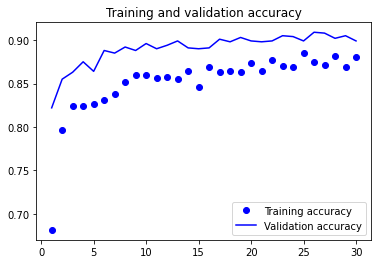

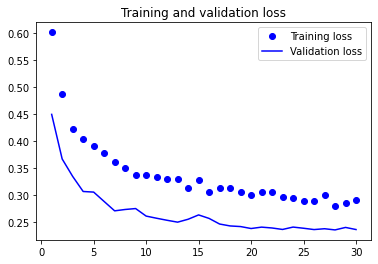

50/50 [==============================] - 4s 77ms/step - loss: 0.2360 - acc: 0.8990


[0.23603741824626923, 0.8989999890327454]

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

model.evaluate(validation_gen)